# Feature Selection and Hyper Parameter Optimization for Digimon Dataset

### Library

In [3]:
import numpy as np
import pandas as pd

# Visulation
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import shap

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Feature Selection
from sklearn.feature_selection import mutual_info_regression

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Odev/3 Digimon/DigiDB_digimonlist.csv")
df.head()

,Number,Digimon,Stage,Type,Attribute,Memory,Equip Slots,Lv 50 HP,Lv50 SP,Lv50 Atk,Lv50 Def,Lv50 Int,Lv50 Spd
0,1,Kuramon,Baby,Free,Neutral,2,0,590,77,79,69,68,95
1,2,Pabumon,Baby,Free,Neutral,2,0,950,62,76,76,69,68
2,3,Punimon,Baby,Free,Neutral,2,0,870,50,97,87,50,75
3,4,Botamon,Baby,Free,Neutral,2,0,690,68,77,95,76,61
4,5,Poyomon,Baby,Free,Neutral,2,0,540,98,54,59,95,86


# Data Exploration

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Number       249 non-null    int64 
 1   Digimon      249 non-null    object
 2   Stage        249 non-null    object
 3   Type         249 non-null    object
 4   Attribute    249 non-null    object
 5   Memory       249 non-null    int64 
 6   Equip Slots  249 non-null    int64 
 7   Lv 50 HP     249 non-null    int64 
 8   Lv50 SP      249 non-null    int64 
 9   Lv50 Atk     249 non-null    int64 
 10  Lv50 Def     249 non-null    int64 
 11  Lv50 Int     249 non-null    int64 
 12  Lv50 Spd     249 non-null    int64 
dtypes: int64(9), object(4)
memory usage: 25.4+ KB


+ No missing data      ✅
+ Data types are True  ✅

In [ ]:
df.describe()

,Number,Memory,Equip Slots,Lv 50 HP,Lv50 SP,Lv50 Atk,Lv50 Def,Lv50 Int,Lv50 Spd
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,125.000000,11.987952,1.574297,1210.883534,109.779116,124.518072,116.377510,112.638554,120.401606
std,72.024301,6.616501,0.854012,326.102384,32.454115,45.639372,32.132696,41.562888,32.633339
min,1.000000,2.000000,0.000000,530.000000,50.000000,52.000000,59.000000,50.000000,61.000000
25%,63.000000,6.000000,1.000000,990.000000,84.000000,89.000000,93.000000,79.000000,92.000000
50%,125.000000,12.000000,1.000000,1180.000000,104.000000,119.000000,113.000000,104.000000,119.000000
75%,187.000000,18.000000,2.000000,1480.000000,132.000000,153.000000,138.000000,138.000000,143.000000
max,249.000000,25.000000,3.000000,2080.000000,203.000000,318.000000,213.000000,233.000000,218.000000


### Unique Values for Categorical Variables

**Se more columns**
+ But it is not read clearly with this method.

In [ ]:
df.apply(lambda x: x.unique())[["Stage", "Type", "Attribute"]]

Stage        [Baby, In-Training, Rookie, Champion, Ultimate...
Type                              [Free, Vaccine, Virus, Data]
Attribute    [Neutral, Fire, Plant, Earth, Dark, Light, Wat...
dtype: object

In [ ]:
len(df["Digimon"].unique()) # + All Digimon columns are unique.

249

In [ ]:
df["Stage"].unique() # The Stage column has 8 unique values.

array(['Baby', 'In-Training', 'Rookie', 'Champion', 'Ultimate', 'Mega',
       'Ultra', 'Armor'], dtype=object)

In [ ]:
df["Type"].unique()  # The Type column has 4 unique values.

array(['Free', 'Vaccine', 'Virus', 'Data'], dtype=object)

In [ ]:
df["Attribute"].unique()  # The Attribute column has 9 unique values.

array(['Neutral', 'Fire', 'Plant', 'Earth', 'Dark', 'Light', 'Water',
       'Wind', 'Electric'], dtype=object)

In [ ]:
df["Memory"].unique()

array([ 2,  3,  5,  4, 14,  8,  6, 12, 10, 22, 16, 20, 18, 25])

+ Is memory feature a numeric variable or categorik variable?

=> Numeric Variable

### Correlation with Heat Map

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


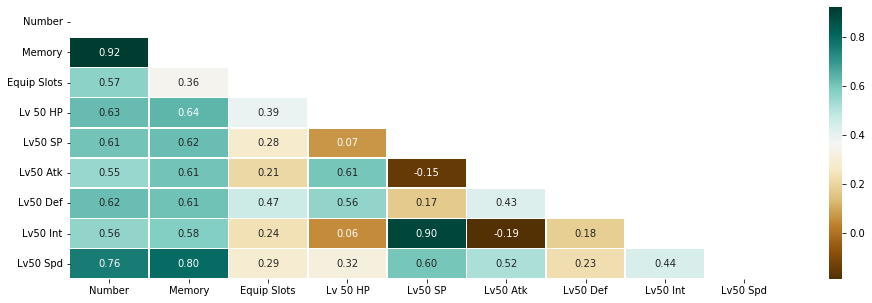

In [ ]:
plt.figure(figsize= (16,5))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool ))
sns.heatmap( df.corr(), mask = mask, annot=True, fmt= '0.2f', linewidths=.5, cmap='BrBG')

Result:

+ HP       -> memory 
+ SP       -> memory
+ ATK      -> memory, HP
+ Def      -> memory, HP
+ Int      -> memory, SP
+ Spd      -> momory, SP, ATk  

correlated

## GroupBy

In [ ]:
df.groupby("Stage")[["Lv50 Int"]].max().sort_values(by=["Lv50 Int"],ascending=False)
#  Mega > Ultra > Rookie > Ultimate > Armor > Champion > In-Training > Baby

,Lv50 Int
Stage,
Mega,233
Ultra,233
Rookie,208
Ultimate,203
Armor,158
Champion,148
In-Training,103
Baby,95


In [ ]:
df.groupby("Type")[["Lv50 Int"]].max().sort_values(by=["Lv50 Int"],ascending=False)
#  Virus > Data > Vaccine > Free

,Lv50 Int
Type,
Virus,233
Data,213
Vaccine,208
Free,148


In [ ]:
df.groupby("Attribute")[["Lv50 Int"]].max().sort_values(by=["Lv50 Int"],ascending=False)
#  Dark > Plant > Light > Neutral > Water > Electric > Fire > Earth > Wind

,Lv50 Int
Attribute,
Dark,233
Plant,213
Light,208
Neutral,203
Water,203
Electric,198
Fire,193
Earth,148
Wind,144


In [ ]:
df.groupby(["Type","Attribute", "Stage"])[["Lv50 Int"]].max().sort_values(by=["Lv50 Int"],ascending=False)[:10]

Lv50 Int
Type    Attribute Stage             
Virus   Dark      Ultra          233
                  Mega           233
Data    Plant     Mega           213
Vaccine Light     Mega           208
                  Rookie         208
        Water     Mega           203
Virus   Neutral   Ultimate       203
Data    Water     Mega           198
Virus   Electric  Mega           198
        Dark      Ultimate       198

In [ ]:
df.groupby(["Type","Attribute"])[["Lv50 Int"]].max().sort_values(by=["Lv50 Int"],ascending=False)[:10]

Lv50 Int
Type    Attribute          
Virus   Dark            233
Data    Plant           213
Vaccine Light           208
Virus   Neutral         203
Vaccine Water           203
Virus   Electric        198
Data    Water           198
        Dark            193
Vaccine Fire            193
Data    Light           188

In [ ]:
df.groupby(["Stage","Attribute"])[["Lv50 Int"]].max().sort_values(by=["Lv50 Int"],ascending=False)[:5]

Lv50 Int
Stage  Attribute          
Mega   Dark            233
Ultra  Dark            233
Mega   Plant           213
       Light           208
Rookie Light           208

### Pivot Table

In [ ]:
df.pivot_table(index="Attribute", columns="Stage", aggfunc={"Lv50 Int": [max] } ).fillna(0)

Lv50 Int                                                         
               max                                                         
Stage        Armor  Baby Champion In-Training   Mega Rookie Ultimate  Ultra
Attribute                                                                  
Dark           0.0   0.0    143.0       102.0  233.0  114.0    198.0  233.0
Earth        148.0   0.0     98.0        54.0  139.0  103.0    128.0    0.0
Electric       0.0   0.0    133.0         0.0  198.0   79.0    175.0    0.0
Fire          89.0   0.0    138.0        52.0  193.0   79.0    133.0    0.0
Light        158.0   0.0    143.0       103.0  208.0  208.0    188.0  154.0
Neutral        0.0  95.0     94.0        78.0  173.0   66.0    203.0   89.0
Plant          0.0   0.0    141.0        75.0  213.0   93.0    168.0    0.0
Water          0.0   0.0    148.0       103.0  203.0  113.0    158.0    0.0
Wind           0.0   0.0     99.0        75.0  144.0   92.0    124.0    0.0

# MACHINE LEARNING

**Data:**
+ Label = "Lv50 Int"

**ML algorithms:**
+ Linear Regression
+ Support Vector Regression
+ Random Forest

**Process:**
+ Feature Selection
+ Hyperparameters Optimization
+ Ensamble

##### Drop and OneHotEncoding

In [5]:
df.drop(["Number", "Digimon"], axis=1, inplace=True)  
# All Number and Digimon values is unique like a ID value therefor I will drop this columns because they are not valuable data.

In [6]:
df = pd.get_dummies(df, columns=["Stage", "Type", "Attribute"]) # one hot encoding

In [7]:
X = df.drop("Lv50 Int", axis=1)
y = df["Lv50 Int"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state =42)

## ML Algorithms Without Feature Selection

### Linear Regression

In [9]:
lr_wFS = LinearRegression()  # linear regression without feature selection
lr_wFS.fit(X_train, y_train)
lr_wFS_pred = lr_wFS.predict(X_test)

In [10]:
# Metrics

print("-->Linear Regression Without Feature Selection \n")
print('MAE -  Mean Absolute Error :', metrics.mean_absolute_error(y_test, lr_wFS_pred))
print('R2 -   R2 Score            : ', metrics.r2_score(y_test, lr_wFS_pred))
print('MSE -  Mean Squared Error  :', metrics.mean_squared_error(y_test, lr_wFS_pred))
print('RSME - Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(y_test, lr_wFS_pred)))
mape = np.mean(np.abs((y_test - lr_wFS_pred) / np.abs(y_test)))
print('MAPE - Mean Absolute Percentage Error :', round(mape * 100, 2))

-->Linear Regression Without Feature Selection 

MAE -  Mean Absolute Error : 6.703126932849215
R2 -   R2 Score            :  0.9579246841706801
MSE -  Mean Squared Error  : 72.05955765819078
RSME - Root Mean Squared Error : 8.488790117454359
MAPE - Mean Absolute Percentage Error : 6.06


### Random Forest

**Hyper parameter optimization with Grid Search**

In [11]:
rf_wFS = RandomForestRegressor(random_state=42)

parameters_rf_wFS = {
    "n_estimators" : [100,200,300,500,800],
    "criterion" : ['squared_error', 'absolute_error', 'poisson'],
    "max_features": ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8]
    # "min_samples_split" : [2,3,4,5],
    # "min_samples_leaf" : [1,2,3,4]
}

grid_rf_wFS = GridSearchCV(estimator=rf_wFS, param_grid=parameters_rf_wFS, cv= 5)
grid_rf_wFS.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 500, 800]})

In [12]:
grid_rf_wFS.best_params_

{'criterion': 'absolute_error',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [13]:
grid_rf_wFS.best_estimator_

RandomForestRegressor(criterion='absolute_error', max_depth=8,
                      max_features='sqrt', random_state=42)

In [14]:
rf_wFS = RandomForestRegressor(criterion= 'absolute_error', max_depth= 8, max_features ='sqrt', n_estimators= 100)
rf_wFS.fit(X_train, y_train)
rf_wFS_pred = rf_wFS.predict(X_test)

In [15]:
print("-->Random Forest Regressor Without Feature Selection \n")
print('MAE -  Mean Absolute Error :', metrics.mean_absolute_error(y_test, rf_wFS_pred))
print('R2 -   R2 Score            : ', metrics.r2_score(y_test, rf_wFS_pred))
print('MSE -  Mean Squared Error  :', metrics.mean_squared_error(y_test, rf_wFS_pred))
print('RSME - Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(y_test, rf_wFS_pred)))
mape = np.mean(np.abs((y_test - rf_wFS_pred) / np.abs(y_test)))
print('MAPE - Mean Absolute Percentage Error :', round(mape * 100, 2))

-->Random Forest Regressor Without Feature Selection 

MAE -  Mean Absolute Error : 15.492469879518072
R2 -   R2 Score            :  0.7949824631286676
MSE -  Mean Squared Error  : 351.1197177710843
RSME - Root Mean Squared Error : 18.738188753747902
MAPE - Mean Absolute Percentage Error : 14.46


### Support Vector Machine

In [16]:
# Preprocessing ust for SVR
df_svr = df.copy()

X_svr = df_svr.drop(["Lv50 Int"], axis=1)
y_svr = df_svr["Lv50 Int"]

X_svr = X_svr.values
y_svr = y_svr.values

# Standart Scaler
sc_X_wFS = StandardScaler()          # Standard Scaler must use for SVR 
X_svr = sc_X_wFS.fit_transform(X_svr)

y_svr = y_svr.reshape(-1,1)
sc_y_wFS = StandardScaler()
y_svr = sc_y_wFS.fit_transform(y_svr)

# Train- Test Split
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_svr, y_svr, test_size=0.33, random_state =42)

**Hyper parameter optimization with Grid Search**

In [ ]:
svr_wFS = SVR()  # svr without feature selection

parameters_svr_wFS = {
    'kernel' :  ['linear', 'poly', 'rbf', 'sigmoid'],
    'C'      :  [1, 1.5, 5, 10],
    'gamma'  :  ['scale', 'auto'],
    'epsilon': [0.1, 0.2, 0.5, 0.7]
}

grid_svr_wFS = GridSearchCV(svr_wFS, parameters_svr_wFS, cv=5) 

grid_svr_wFS.fit(X_train_s, y_train_s)

In [18]:
grid_svr_wFS.best_params_

{'C': 5, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

In [19]:
svr_wFS =SVR(C= 5, epsilon=0.1, gamma = "scale", kernel="linear")
svr_wFS.fit(X_train_s, y_train_s)
svr_wFS_pred = svr_wFS.predict(X_test_s)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [20]:
print("-->Support Vector Regressor Without Feature Selection \n")
print('MAE -  Mean Absolute Error :', metrics.mean_absolute_error(y_test_s, svr_wFS_pred))
print('R2 -   R2 Score            : ', metrics.r2_score(y_test_s, svr_wFS_pred))
print('MSE -  Mean Squared Error  :', metrics.mean_squared_error(y_test_s, svr_wFS_pred))
print('RSME - Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(y_test_s, svr_wFS_pred)))
mape = np.mean(np.abs((y_test_s - svr_wFS_pred) / np.abs(y_test_s)))
print('MAPE - Mean Absolute Percentage Error :', round(mape * 100, 2))

-->Support Vector Regressor Without Feature Selection 

MAE -  Mean Absolute Error : 0.16701461267892193
R2 -   R2 Score            :  0.9561455029540569
MSE -  Mean Squared Error  : 0.0436530478787614
RSME - Root Mean Squared Error : 0.20893311819518082
MAPE - Mean Absolute Percentage Error : 377.11


### **Sonuç:** Without Feature Selection

**Linear Regression:**
+ MAE -  Mean Absolute Error : 6.703126932849215
+ R2 -   R2 Score            :  0.9579246841706801

**Random Forest Regression:**
+ MAE -  Mean Absolute Error : 15.492469879518072
+ R2 -   R2 Score            :  0.7949824631286676


**Support Vector Regression:**
+ MAE -  Mean Absolute Error : 0.16701461267892193
+ R2 -   R2 Score            :  0.9561455029540569

## With Feature Selection ML Algorithms

### Random Forest Regressor FS1




In [21]:
rf_fs1 = RandomForestRegressor(criterion= 'absolute_error', max_depth= 8, max_features ='sqrt', n_estimators= 100)
rf_fs1.fit(X_train, y_train)
rf_fs1_pred = rf_fs1.predict(X_test)

#### Feature Importance 
**Feature Selection**

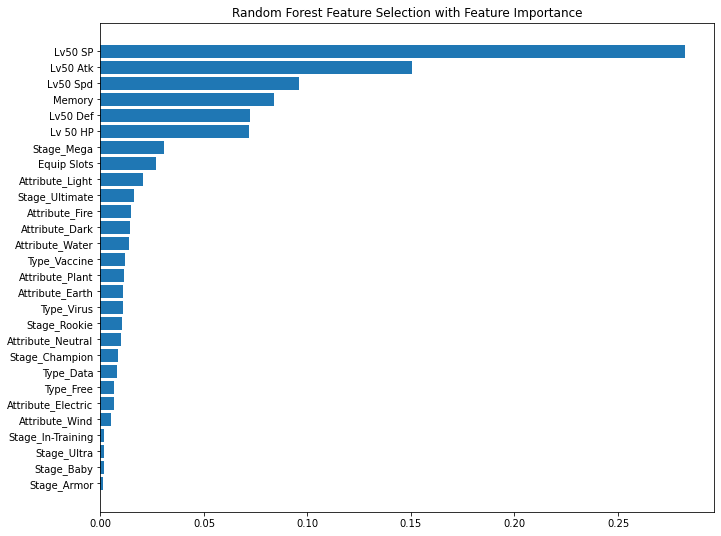

In [22]:
# visulation method 1
sorted_index = rf_fs1.feature_importances_.argsort()

figure(figsize=(11,9))
plt.barh(X_train.columns[sorted_index], rf_fs1.feature_importances_[sorted_index])
plt.title("Random Forest Feature Selection with Feature Importance")
plt.show()

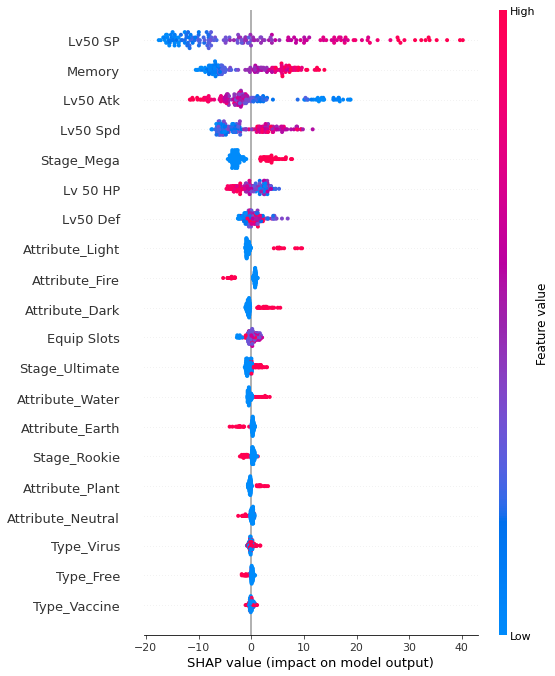

In [23]:
# visulation method 2 

explainer = shap.TreeExplainer(rf_fs1)
shap_values =explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

+ Most Important Columns - Feature Selaction Method 1

In [24]:
X_train_fs1 = X_train[['Memory', 'Lv 50 HP', 'Lv50 SP', 'Lv50 Atk', 'Lv50 Def','Lv50 Spd']]
X_test_fs1  = X_test[['Memory', 'Lv 50 HP', 'Lv50 SP', 'Lv50 Atk', 'Lv50 Def','Lv50 Spd']]

**Grid Search**

In [25]:
rf_fs1 = RandomForestRegressor(random_state=42)

parameters_rf_fs1 = {
    "n_estimators" : [100,200,300,500,800],
    "criterion" : ['squared_error', 'absolute_error', 'poisson'],
    "max_features": ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8]
    # "min_samples_split" : [2,3,4,5],
    # "min_samples_leaf" : [1,2,3,4]
}

grid_rf_fs1 = GridSearchCV(estimator=rf_fs1, param_grid=parameters_rf_fs1, cv= 5)
grid_rf_fs1.fit(X_train_fs1, y_train) 

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 500, 800]})

In [26]:
grid_rf_fs1.best_params_

{'criterion': 'squared_error',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 800}

In [27]:
rf_fs1 = RandomForestRegressor(n_estimators=800, max_features="sqrt", max_depth=8, criterion="squared_error")
rf_fs1.fit(X_train_fs1, y_train)
rf_fs1_pred = rf_fs1.predict(X_test_fs1)

In [28]:
print("-->Random Forest Regressor Feature Selection Method 1 \n")
print('MAE -  Mean Absolute Error :', metrics.mean_absolute_error(y_test, rf_fs1_pred))
print('R2 -   R2 Score            : ', metrics.r2_score(y_test, rf_fs1_pred))
print('MSE -  Mean Squared Error  :', metrics.mean_squared_error(y_test, rf_fs1_pred))
print('RSME - Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(y_test, rf_fs1_pred)))
mape = np.mean(np.abs((y_test - rf_fs1_pred) / np.abs(y_test)))
print('MAPE - Mean Absolute Percentage Error :', round(mape * 100, 2))

-->Random Forest Regressor Feature Selection Method 1 

MAE -  Mean Absolute Error : 12.218920816191334
R2 -   R2 Score            :  0.8570178668688416
MSE -  Mean Squared Error  : 244.87586280400737
RSME - Root Mean Squared Error : 15.648509922801193
MAPE - Mean Absolute Percentage Error : 11.6


### Linear Regression FS1

+ There is no Feature Selection in the Linear Regression model, so I found important features with the Random Forest Regresor model, then applied it to the Linear Regression Model and SVR.

In [29]:
lr_fs1 = LinearRegression()  # linear regression feature selection 1
lr_fs1.fit(X_train_fs1, y_train)
lr_fs1_pred = lr_fs1.predict(X_test_fs1)

In [30]:
# metrics Feature Selection 1

print("-->Linear Regression Feature Selection Method 1 \n")
print('MAE -  Mean Absolute Error :', metrics.mean_absolute_error(y_test, lr_fs1_pred))
print('R2 -   R2 Score            : ', metrics.r2_score(y_test, lr_fs1_pred))
print('MSE -  Mean Squared Error  :', metrics.mean_squared_error(y_test, lr_fs1_pred))
print('RSME - Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(y_test, lr_fs1_pred)))
mape = np.mean(np.abs((y_test - lr_fs1_pred) / np.abs(y_test)))
print('MAPE - Mean Absolute Percentage Error :', round(mape * 100, 2))

-->Linear Regression Feature Selection Method 1 

MAE -  Mean Absolute Error : 11.61628852123095
R2 -   R2 Score            :  0.8850722175717725
MSE -  Mean Squared Error  : 196.8290671425897
RSME - Root Mean Squared Error : 14.029578295251419
MAPE - Mean Absolute Percentage Error : 11.19


### Support Vector Regression FS1
+ + There is no Feature Selection in the Linear Regression model, so I found important features with the Random Forest Regresor model, then applied it to the Linear Regression Model and SVR.

In [31]:
# Preprocessing ust for SVR
df_fs1 = df.copy()

# features and label
Xfs1 = df_fs1.drop(["Lv50 Int"], axis=1)
yfs1 = df_fs1["Lv50 Int"]

# feature selection 1 - most importance columns
Xfs1 = Xfs1[['Memory', 'Lv 50 HP', 'Lv50 SP', 'Lv50 Atk', 'Lv50 Def','Lv50 Spd']]

# convert to numpy array
Xfs1 = Xfs1.values
yfs1 = yfs1.values

# Standart Scaler
sc_X_wFS = StandardScaler()          # Standard Scaler must use for SVR 
Xfs1 = sc_X_wFS.fit_transform(Xfs1)

yfs1 = yfs1.reshape(-1,1)
sc_y_wFS = StandardScaler()
yfs1 = sc_y_wFS.fit_transform(yfs1)

# Train- Test Split
X_train_sfs1, X_test_sfs1, y_train_s, y_test_s = train_test_split(Xfs1, yfs1, test_size=0.33, random_state =42)

In [ ]:
svr_fs1 = SVR()  # svr without feature selection

parameters_svr_fs1 = {
    'kernel' :  ['linear', 'poly', 'rbf', 'sigmoid'],
    'C'      :  [1, 1.5, 5, 10],
    'gamma'  :  ['scale', 'auto'],
    'epsilon': [0.1, 0.2, 0.5, 0.7]
}

grid_svr_fs1 = GridSearchCV(svr_fs1, parameters_svr_fs1, cv=5) 

grid_svr_fs1.fit(X_train_sfs1, y_train_s)

In [33]:
grid_svr_fs1.best_params_

{'C': 10, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}

In [34]:
svr_fs1 = SVR(C = 10, epsilon = 0.1, gamma ="scale", kernel="rbf")
svr_fs1.fit(X_train_sfs1, y_train_s)
svr_fs1_pred = svr_fs1.predict(X_test_sfs1)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [35]:
# metrics Feature Selection 1

print("-->Support Vector Regressor Feature Selection Method 1 \n")
print('MAE -  Mean Absolute Error :', metrics.mean_absolute_error(y_test_s, svr_fs1_pred ))
print('R2 -   R2 Score            : ', metrics.r2_score(y_test_s, svr_fs1_pred ))
print('MSE -  Mean Squared Error  :', metrics.mean_squared_error(y_test_s, svr_fs1_pred ))
print('RSME - Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(y_test_s, svr_fs1_pred )))
mape = np.mean(np.abs((y_test_s - svr_fs1_pred ) / np.abs(y_test_s)))
print('MAPE - Mean Absolute Percentage Error :', round(mape * 100, 2))

-->Support Vector Regressor Feature Selection Method 1 

MAE -  Mean Absolute Error : 0.19401923265477458
R2 -   R2 Score            :  0.9403284441255666
MSE -  Mean Squared Error  : 0.05939744977254944
RSME - Root Mean Squared Error : 0.24371592022793553
MAPE - Mean Absolute Percentage Error : 369.18


## Result: FS1


-->Random Forest Regressor Feature Selection Method 1 

+ MAE -  Mean Absolute Error : 12.218920816191334
+ R2 -   R2 Score            :  0.8570178668688416

-->Linear Regressor Feature Selection Method 1 

+ MAE -  Mean Absolute Error : 11.61628852123095
+ R2 -   R2 Score            :  0.8850722175717725


-->Support Vector Regressor Feature Selection Method 1 

+ MAE -  Mean Absolute Error : 0.19401923265477458
+ R2 -   R2 Score            :  0.9403284441255666

## Feature Selection Method 2

Filter Method

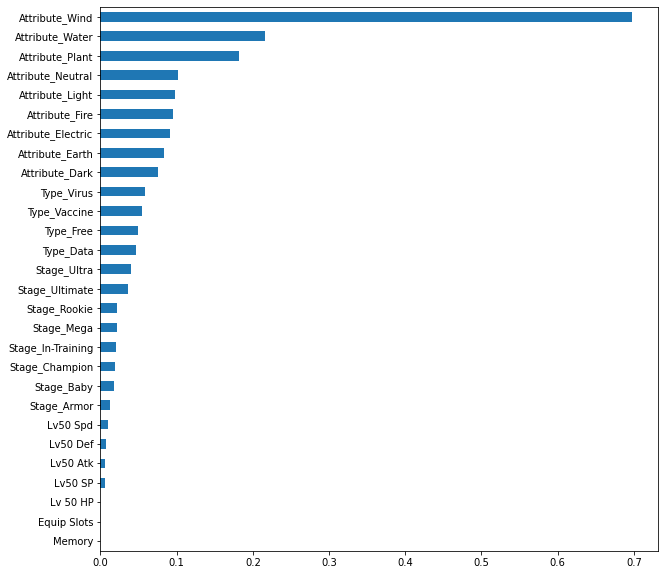

In [37]:
figure(figsize=(10,10))

impt_features2 = mutual_info_regression(X,y)
sort_index = impt_features2.argsort()
pd.Series(impt_features2[sort_index], X.columns[0: len(X.columns)]).plot(kind="barh")

'Attribute_Electric','Attribute_Fire', 'Attribute_Light', 'Attribute_Neutral','Attribute_Plant', 'Attribute_Water', 'Attribute_Wind'

In [38]:
X_train_fs2 = X_train[['Attribute_Electric','Attribute_Fire', 'Attribute_Light', 'Attribute_Neutral','Attribute_Plant', 'Attribute_Water', 'Attribute_Wind']]
X_test_fs2  = X_test[['Attribute_Electric','Attribute_Fire', 'Attribute_Light', 'Attribute_Neutral','Attribute_Plant', 'Attribute_Water', 'Attribute_Wind']]

### Linear Regression FS2

In [39]:
lr_fs2 = LinearRegression()
lr_fs2.fit(X_train_fs2, y_train)
lr_fs2_pred = lr_fs2.predict(X_test_fs2)

In [41]:
print("-->Linear Regression Feature Selection Method 2 \n")
print('MAE -  Mean Absolute Error :', metrics.mean_absolute_error(y_test, lr_fs2_pred ))
print('R2 -   R2 Score            : ', metrics.r2_score(y_test, lr_fs2_pred ))
print('MSE -  Mean Squared Error  :', metrics.mean_squared_error(y_test, lr_fs2_pred ))
print('RSME - Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(y_test, lr_fs2_pred )))
mape = np.mean(np.abs((y_test - lr_fs2_pred ) / np.abs(y_test)))
print('MAPE - Mean Absolute Percentage Error :', round(mape * 100, 2))

-->Linear Regression Feature Selection Method 2 

MAE -  Mean Absolute Error : 29.455752776697235
R2 -   R2 Score            :  0.18865861282836582
MSE -  Mean Squared Error  : 1389.5297115899486
RSME - Root Mean Squared Error : 37.276396172242144
MAPE - Mean Absolute Percentage Error : 27.95


### Random Forest Regressor FS2

In [42]:
rf_fs2 = RandomForestRegressor(random_state=42)

parameters_rf_fs2 = {
    "n_estimators" : [100,200,300,500,800],
    "criterion" : ['squared_error', 'absolute_error', 'poisson'],
    "max_features": ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8]
}

grid_rf_fs2 = GridSearchCV(estimator=rf_fs2, param_grid=parameters_rf_fs2, cv= 5)
grid_rf_fs2.fit(X_train_fs2, y_train) 

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 500, 800]})

In [43]:
grid_rf_fs2.best_params_

{'criterion': 'squared_error',
 'max_depth': 4,
 'max_features': 'sqrt',
 'n_estimators': 800}

In [44]:
rf_fs2 = RandomForestRegressor(n_estimators=800, max_features="sqrt", max_depth=4, criterion="squared_error")
rf_fs2.fit(X_train_fs2, y_train)
rf_fs2_pred = rf_fs2.predict(X_test_fs2)

In [45]:
print("-->Random Forest Feature Selection Method 2 \n")
print('MAE -  Mean Absolute Error :', metrics.mean_absolute_error(y_test, rf_fs2_pred ))
print('R2 -   R2 Score            : ', metrics.r2_score(y_test, rf_fs2_pred ))
print('MSE -  Mean Squared Error  :', metrics.mean_squared_error(y_test, rf_fs2_pred ))
print('RSME - Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(y_test,rf_fs2_pred )))
mape = np.mean(np.abs((y_test - rf_fs2_pred ) / np.abs(y_test)))
print('MAPE - Mean Absolute Percentage Error :', round(mape * 100, 2))

-->Random Forest Feature Selection Method 2 

MAE -  Mean Absolute Error : 29.954422607413985
R2 -   R2 Score            :  0.17147684771510963
MSE -  Mean Squared Error  : 1418.955762694844
RSME - Root Mean Squared Error : 37.66902922421607
MAPE - Mean Absolute Percentage Error : 28.38


### Support Vector Regression FS2

In [46]:
# Preprocessing ust for SVR
df_fs2 = df.copy()

# features and label
Xfs2 = df_fs2.drop(["Lv50 Int"], axis=1)
yfs2 = df_fs2["Lv50 Int"]

# feature selection 1 - most importance columns
Xfs2 = Xfs2[['Attribute_Electric','Attribute_Fire', 'Attribute_Light', 'Attribute_Neutral','Attribute_Plant', 'Attribute_Water', 'Attribute_Wind']]

# convert to numpy array
Xfs2 = Xfs2.values
yfs2 = yfs2.values

# Standart Scaler
sc_X_FS = StandardScaler()          # Standard Scaler must use for SVR 
Xfs2 = sc_X_FS.fit_transform(Xfs2)

yfs2 = yfs2.reshape(-1,1)
sc_y_FS = StandardScaler()
yfs2 = sc_y_FS.fit_transform(yfs2)

# Train- Test Split
X_train_sfs2, X_test_sfs2, y_train_s, y_test_s = train_test_split(Xfs2, yfs2, test_size=0.33, random_state =42)

In [ ]:
svr_fs2 = SVR()  # svr without feature selection

parameters_svr_fs2 = {
    'kernel' :  ['linear', 'poly', 'rbf', 'sigmoid'],
    'C'      :  [1, 1.5, 5, 10],
    'gamma'  :  ['scale', 'auto'],
    'epsilon': [0.1, 0.2, 0.5, 0.7]
}

grid_svr_fs2 = GridSearchCV(svr_fs2, parameters_svr_fs2, cv=5) 

grid_svr_fs2.fit(X_train_sfs2, y_train_s)

In [48]:
grid_svr_fs2.best_params_

{'C': 1, 'epsilon': 0.7, 'gamma': 'auto', 'kernel': 'sigmoid'}

In [49]:
svr_fs2 = SVR(C = 1, epsilon=0.7, gamma = "auto", kernel="sigmoid")
svr_fs2.fit(X_train_sfs2, y_train_s)
svr_fs2_pred = svr_fs2.predict(X_test_sfs2)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [50]:
print("-->Support Vector Regressor Feature Selection Method 2 \n")
print('MAE -  Mean Absolute Error :', metrics.mean_absolute_error(y_test_s, svr_fs2_pred ))
print('R2 -   R2 Score            : ', metrics.r2_score(y_test_s, svr_fs2_pred ))
print('MSE -  Mean Squared Error  :', metrics.mean_squared_error(y_test_s, svr_fs2_pred ))
print('RSME - Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(y_test_s, svr_fs2_pred )))
mape = np.mean(np.abs((y_test_s - svr_fs2_pred ) / np.abs(y_test_s)))
print('MAPE - Mean Absolute Percentage Error :', round(mape * 100, 2))

-->Support Vector Regressor Feature Selection Method 2 

MAE -  Mean Absolute Error : 0.727142745151816
R2 -   R2 Score            :  0.16106833812841126
MSE -  Mean Squared Error  : 0.8350779616586004
RSME - Root Mean Squared Error : 0.9138260018507902
MAPE - Mean Absolute Percentage Error : 185.45


# Result

**Without Feature Selection**

**Linear Regression:**
+ MAE -  Mean Absolute Error :  6.703126932849215
+ R2 -   R2 Score            :  0.9579246841706801

**Random Forest Regression:**
+ MAE -  Mean Absolute Error :  15.668433734939757
+ R2 -   R2 Score            :  0.7931045093431051


**Support Vector Regression:**

+ MAE -  Mean Absolute Error : 0.16701461267892193
+ R2 -   R2 Score            :  0.9561455029540569




**Feature Selection Method 1**


-->Random Forest Regressor Feature Selection Method 1 

+ MAE -  Mean Absolute Error : 12.420771389271401
+ R2 -   R2 Score            :  0.8505740843586893


-->Linear Regressor Feature Selection Method 1 

+ MAE -  Mean Absolute Error : 6.703126932849215
+ R2 -   R2 Score            :  0.9579246841706801



-->Support Vector Regressor Feature Selection Method 1 

MAE -  Mean Absolute Error : 0.19401923265477458
R2 -   R2 Score            :  0.9403284441255666




**Feature Selection Method 2**

-->Linear Regression Feature Selection Method 2 

+ MAE -  Mean Absolute Error : 29.455752776697235
+ R2 -   R2 Score            :  0.18865861282836582


-->Random Forest Feature Selection Method 2 

+ MAE -  Mean Absolute Error : 29.954422607413985
+ R2 -   R2 Score            :  0.17147684771510963

-->Support Vector Regressor Feature Selection Method 2 

+ MAE -  Mean Absolute Error : 0.727142745151816
+ R2 -   R2 Score            :  0.16106833812841126




